In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

%matplotlib inline

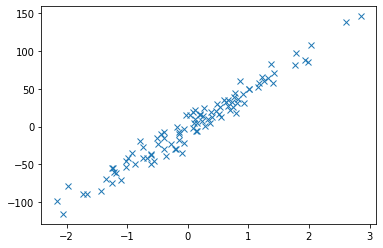

In [2]:
features = 1
samples = 100
x, y = datasets.make_regression(n_features=features, n_samples=samples, noise=10)
plt.plot(x, y, 'x')

# Gradient Descent

In [3]:
θ = (np.random.rand(features + 1) - 0.5) * 100
θ = θ.reshape(1, -1)
θ

array([[-28.89908336,  31.8586788 ]])

error: 622.6666304346542


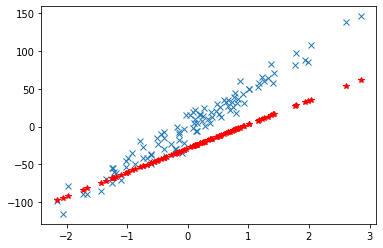

In [4]:
prerdictions = θ[:, 0] + θ[:,1:] @ x.T
prerdictions = prerdictions.reshape(-1)

error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)

plt.plot(x, y, 'x')
plt.plot(x, prerdictions, '*r')
print(f'error: {error}')

Error: 52.32260776512342


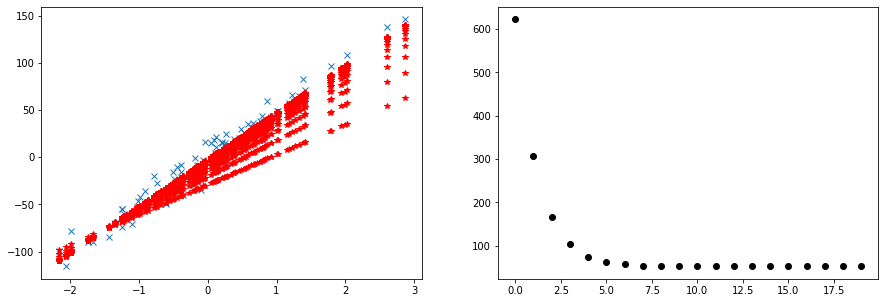

In [5]:
def gradient_decent(repeat, lr = 0.3):

    plt.figure(1, figsize=(15, 5))
    plt.subplot(121)
    plt.plot(x, y, 'x')
    for i in range(repeat):

        prerdictions = θ[:, 0] + θ[:,1:] @ x.T
        prerdictions = prerdictions.reshape(-1)

        error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)
        θ[:,0] -= lr/samples * np.sum(prerdictions - y)
        θ[:,1:] -= lr/samples * np.sum((prerdictions - y) @ x)

        plt.subplot(121)
        plt.plot(x, prerdictions, '*r')
        plt.subplot(122)
        plt.plot(i, error, 'ok')

    print(f'Error: {error}')
    plt.show()

gradient_decent(20)

# Normal Equation

$\theta = (X^TX)^{-1}X^TY$

In [6]:
rows, cols = x.shape

features = np.ones([rows, cols + 1])
features[:,1:] = x

θ = np.linalg.pinv(features.T @ features) @ features.T @ y
θ = θ.reshape(1, -1)
θ

array([[-2.21204168, 49.7662799 ]])

Error: 52.32235704800517


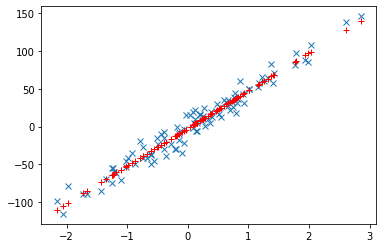

In [7]:
prerdictions = θ[:, 0] + θ[:,1:] @ x.T
prerdictions = prerdictions.reshape(-1)

error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)

print(f'Error: {error}')
plt.plot(x, y, 'x')
plt.plot(x, prerdictions, '+r')
plt.show()